In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler 

### Columns' description are listed below:

- Rk : Rank
- Player : Player's name
- Pos : Position
- Age : Player's age
- Tm : Team
- G : Games played
- GS : Games started
- MP : Minutes played per game
- FG : Field goals per game
- FGA : Field goal attempts per game
- FG% : Field goal percentage
- 3P : 3-point field goals per game
- 3PA : 3-point field goal attempts per game
- 3P% : 3-point field goal percentage
- 2P : 2-point field goals per game
- 2PA : 2-point field goal attempts per game
- 2P% : 2-point field goal percentage
- eFG% : Effective field goal percentage
- FT : Free throws per game
- FTA : Free throw attempts per game
- FT% : Free throw percentage
- ORB : Offensive rebounds per game
- DRB : Defensive rebounds per game
- TRB : Total rebounds per game
- AST : Assists per game
- STL : Steals per game
- BLK : Blocks per game
- TOV : Turnovers per game
- PF : Personal fouls per game
- PTS : Points per game

#### From https://www.kaggle.com/datasets/vivovinco/2023-2024-nba-player-stats

In [2]:
#Import Dataset
df_raw = pd.read_csv("./Data/raw_data.csv", delimiter = ";")
df_raw

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,PF,24,NYK,9,2,20.4,2.3,4.8,...,0.385,2.4,1.8,4.2,0.6,0.4,1.3,0.4,2.2,5.2
1,2,Bam Adebayo,C,26,MIA,5,5,38.4,9.6,19.4,...,0.714,2.2,7.2,9.4,3.8,0.4,0.0,1.6,3.0,22.6
2,3,Nickeil Alexander-Walker,SG,25,MIN,16,1,23.6,2.6,7.0,...,1.000,0.3,1.4,1.8,2.3,0.6,0.4,0.9,1.5,7.3
3,4,Grayson Allen,SG,28,PHO,2,2,21.5,0.5,2.5,...,1.000,1.0,3.0,4.0,1.0,0.5,0.0,1.5,2.0,3.5
4,5,Jarrett Allen,C,25,CLE,4,4,31.8,6.3,9.3,...,0.692,3.8,10.0,13.8,1.3,1.3,1.0,1.3,2.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,210,Jaylin Williams,C,21,OKC,10,0,12.7,1.6,3.3,...,0.750,0.4,2.8,3.2,1.5,0.4,0.3,0.3,1.1,4.4
210,211,Kenrich Williams,PF,29,OKC,7,0,4.6,0.3,1.1,...,0.000,0.1,1.0,1.1,0.4,0.1,0.0,0.0,0.4,0.6
211,212,Delon Wright,PG,31,MIA,4,1,26.8,3.0,5.0,...,1.000,0.5,2.5,3.0,1.8,1.0,0.3,0.0,1.3,8.0
212,213,Thaddeus Young,PF,35,PHO,1,0,4.0,0.0,0.0,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
#No Missing Values
df_raw.isnull().any()

Rk        False
Player    False
Pos       False
Age       False
Tm        False
G         False
GS        False
MP        False
FG        False
FGA       False
FG%       False
3P        False
3PA       False
3P%       False
2P        False
2PA       False
2P%       False
eFG%      False
FT        False
FTA       False
FT%       False
ORB       False
DRB       False
TRB       False
AST       False
STL       False
BLK       False
TOV       False
PF        False
PTS       False
dtype: bool

### In the context of basketball players, it is okay to have outliers, as some players will likely be much better than others. Thus, no extreme outlier removal will be done

### Split df into numerical and categorical features and drop PTS since that is target values, Rk since it is unnecessary information, and Pos since it seems to have no major bearing on the results, and as a categorical feature, would have to be one-hot encoded otherwise


In [4]:
numerical_df = df_raw.select_dtypes(include='number')
numerical_df = numerical_df.drop(['PTS', 'Rk'], axis = 1)

categorical_df = df_raw.select_dtypes(include = 'object')
categorical_df = categorical_df.drop(['Pos'], axis = 1)

PF Median: 5.0
C Median: 6.0
SG Median: 5.35
PG Median: 7.5
SF Median: 4.5


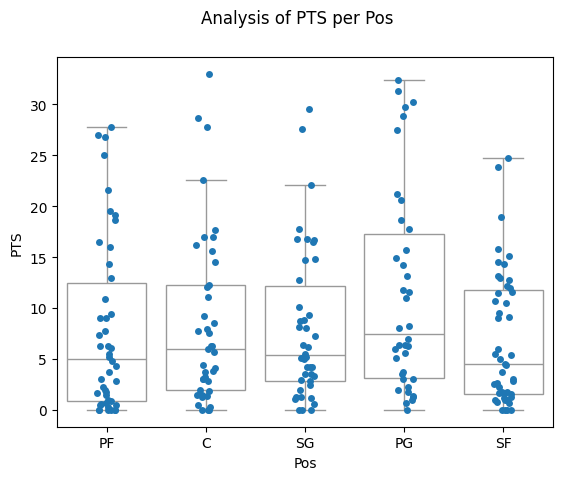

In [7]:
#Seeing if Pos is a significant variable when trying to predit PTS
sns.stripplot(data = df_raw, x = 'Pos', y = 'PTS')
sns.boxplot(data = df_raw, x = 'Pos', y = 'PTS', color = 'white', showfliers = False)
plt.suptitle("Analysis of PTS per Pos")

#None of these median values are particularly distinct from each other. 
#An argument could be made that there is a disparity between PG and SF, but I do not think it is worth keeping this data point
print(f"PF Median: {np.median(df_raw.loc[df_raw['Pos'] == 'PF']['PTS'])}")
print(f"C Median: {np.median(df_raw.loc[df_raw['Pos'] == 'C']['PTS'])}")
print(f"SG Median: {np.median(df_raw.loc[df_raw['Pos'] == 'SG']['PTS'])}")
print(f"PG Median: {np.median(df_raw.loc[df_raw['Pos'] == 'PG']['PTS'])}")
print(f"SF Median: {np.median(df_raw.loc[df_raw['Pos'] == 'SF']['PTS'])}")

plt.savefig("./Figures/EDA/Pos_Analysis", dpi=100, bbox_inches = "tight")

### Thus, the remaining categorical features are player and team names. These features will not be one-hot encoded, nor will they directly be used in analysis. Instead, they will be used as labels

In [8]:
categorical_df

,Player,Tm
0,Precious Achiuwa,NYK
1,Bam Adebayo,MIA
2,Nickeil Alexander-Walker,MIN
3,Grayson Allen,PHO
4,Jarrett Allen,CLE
...,...,...
209,Jaylin Williams,OKC
210,Kenrich Williams,OKC
211,Delon Wright,MIA
212,Thaddeus Young,PHO


### Now, it will be decided if the numerical data needs normalization

In [9]:
numerical_df

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF
0,24,9,2,20.4,2.3,4.8,0.488,0.0,0.3,0.000,...,1.4,0.385,2.4,1.8,4.2,0.6,0.4,1.3,0.4,2.2
1,26,5,5,38.4,9.6,19.4,0.495,0.4,2.0,0.200,...,4.2,0.714,2.2,7.2,9.4,3.8,0.4,0.0,1.6,3.0
2,25,16,1,23.6,2.6,7.0,0.366,1.5,5.1,0.296,...,0.6,1.000,0.3,1.4,1.8,2.3,0.6,0.4,0.9,1.5
3,28,2,2,21.5,0.5,2.5,0.200,0.5,2.5,0.200,...,2.0,1.000,1.0,3.0,4.0,1.0,0.5,0.0,1.5,2.0
4,25,4,4,31.8,6.3,9.3,0.676,0.0,0.0,0.000,...,6.5,0.692,3.8,10.0,13.8,1.3,1.3,1.0,1.3,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,21,10,0,12.7,1.6,3.3,0.485,0.9,2.2,0.409,...,0.4,0.750,0.4,2.8,3.2,1.5,0.4,0.3,0.3,1.1
210,29,7,0,4.6,0.3,1.1,0.250,0.0,0.7,0.000,...,0.0,0.000,0.1,1.0,1.1,0.4,0.1,0.0,0.0,0.4
211,31,4,1,26.8,3.0,5.0,0.600,1.5,2.5,0.600,...,0.5,1.000,0.5,2.5,3.0,1.8,1.0,0.3,0.0,1.3
212,35,1,0,4.0,0.0,0.0,0.000,0.0,0.0,0.000,...,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


C:\Users\kjeet\AppData\Local\Temp\ipykernel_23768\2196450690.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


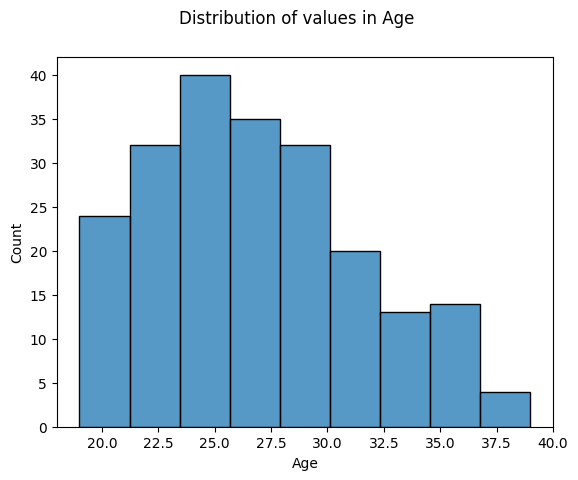

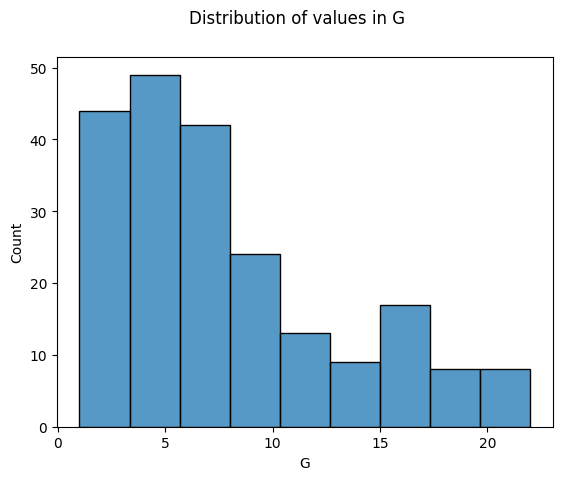

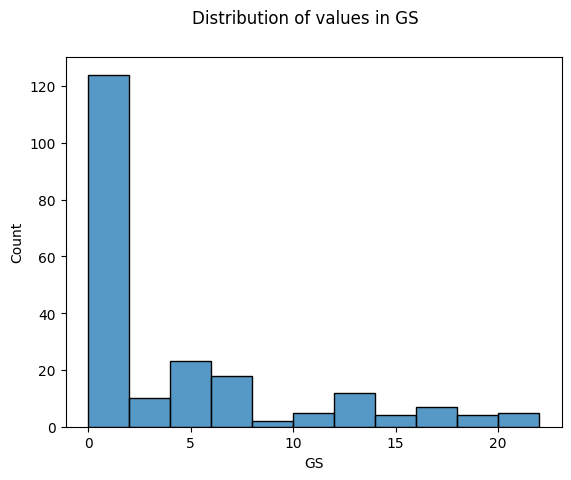

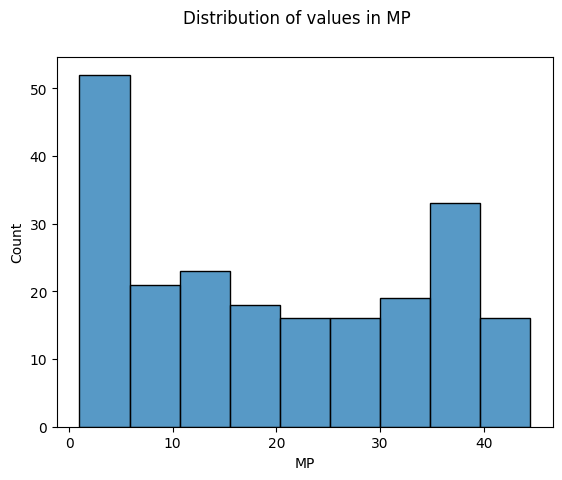

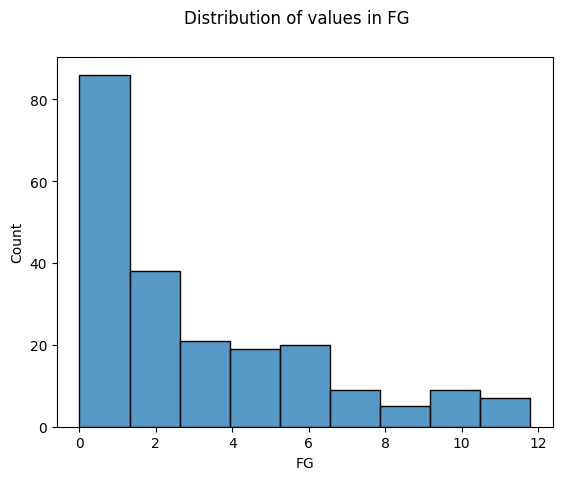

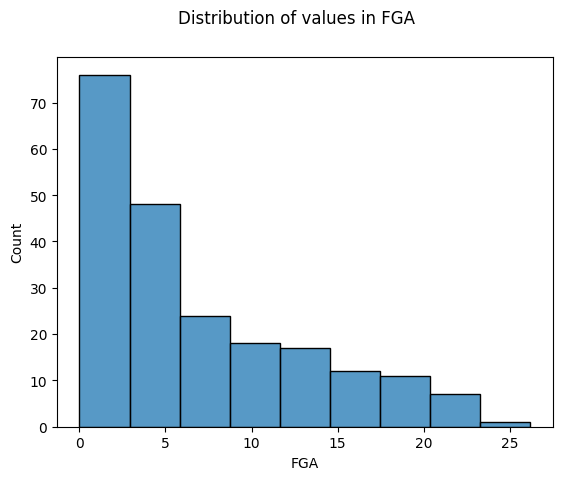

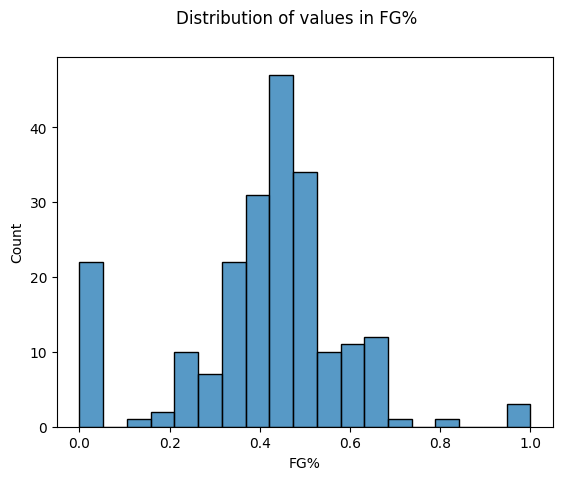

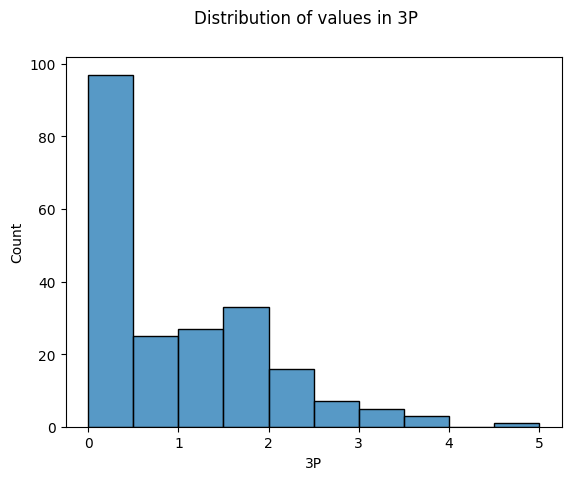

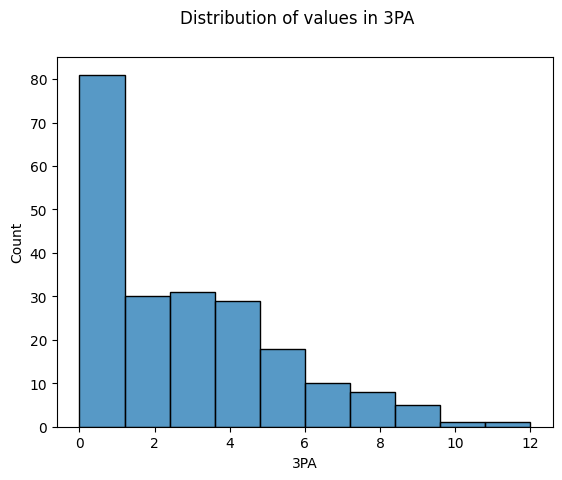

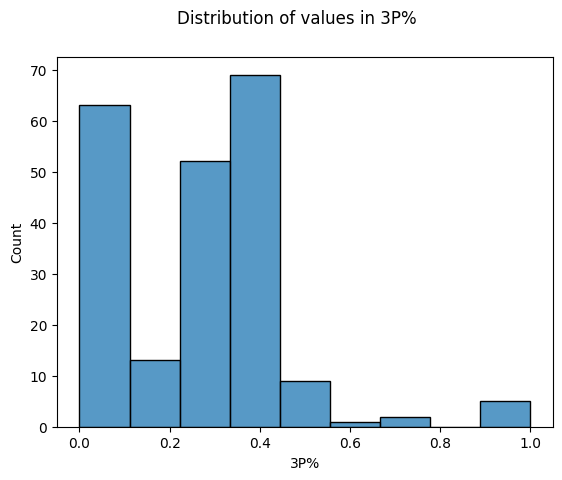

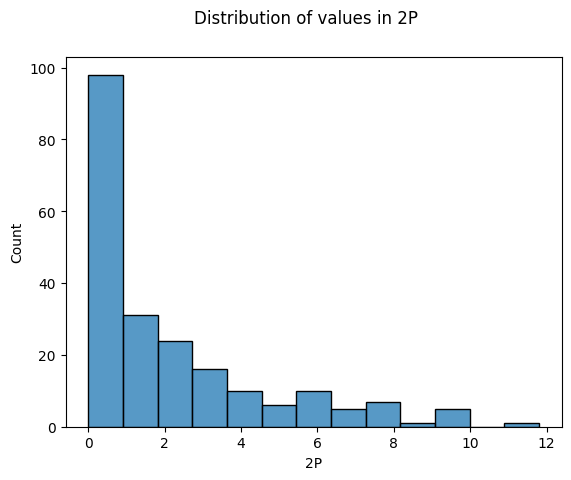

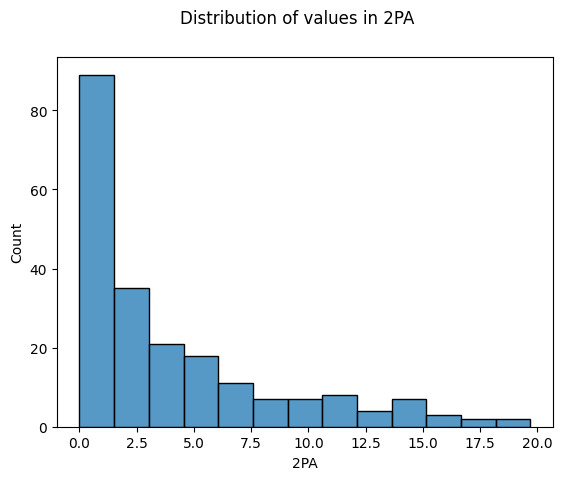

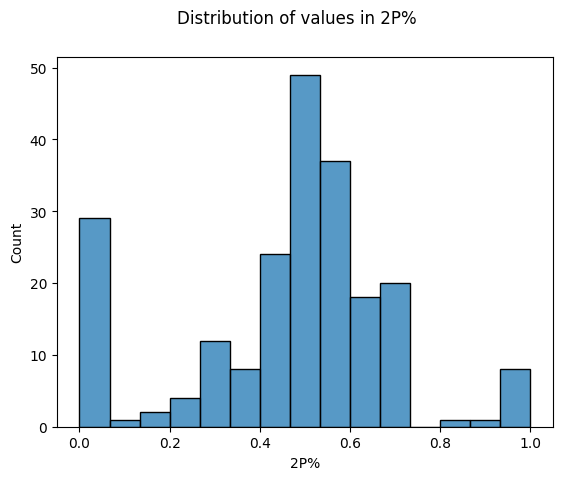

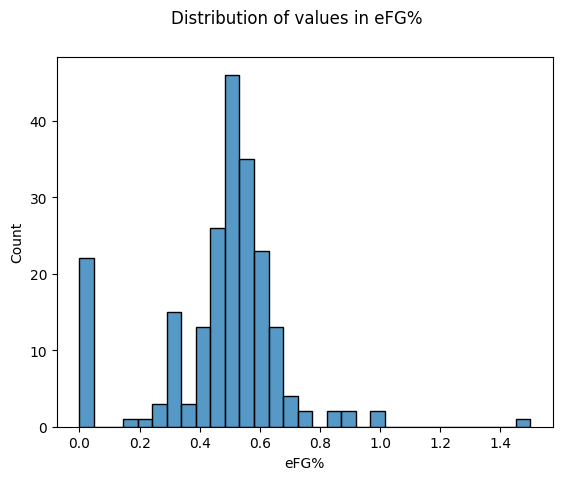

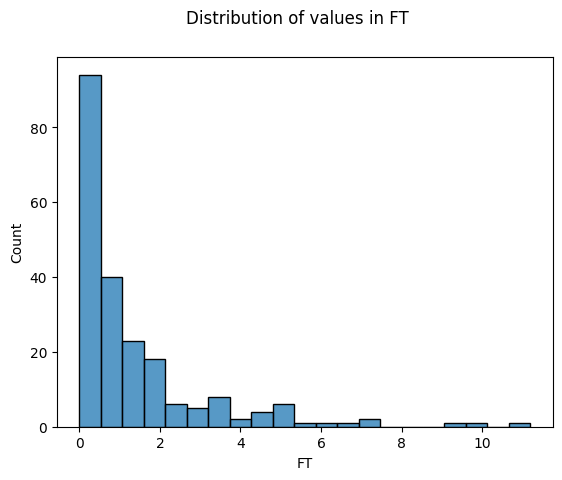

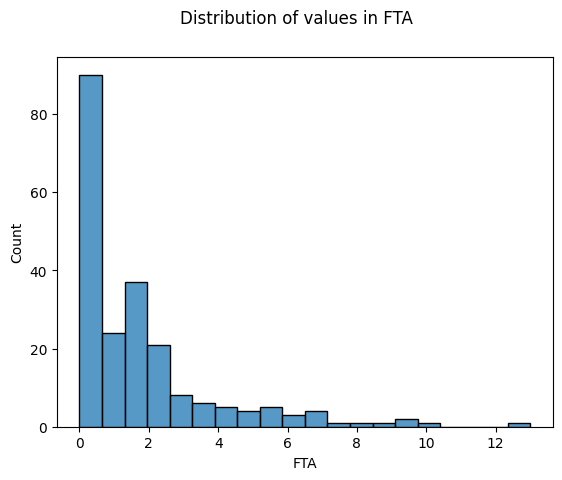

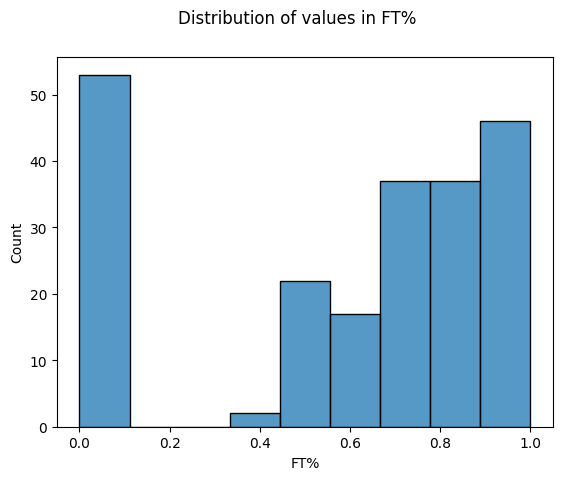

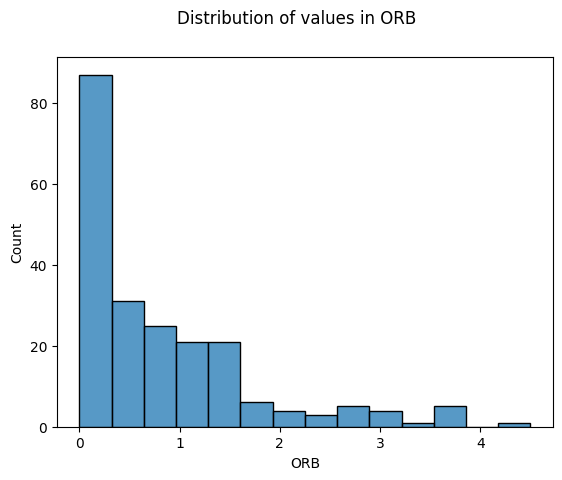

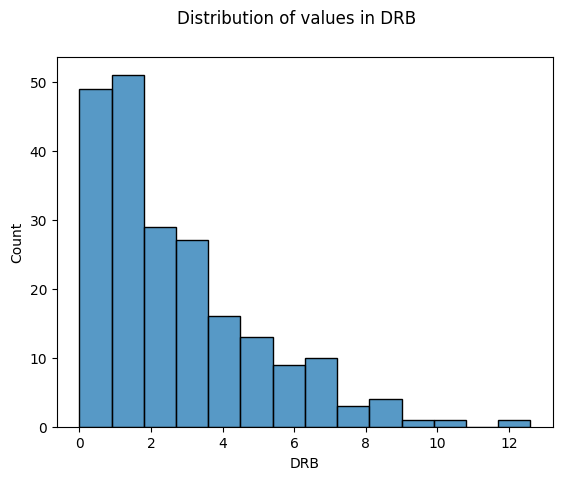

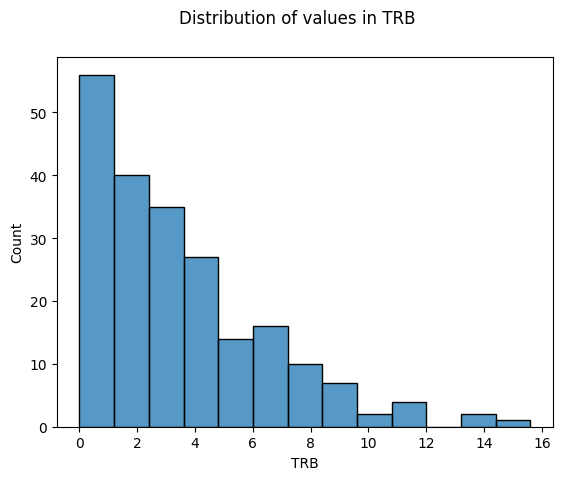

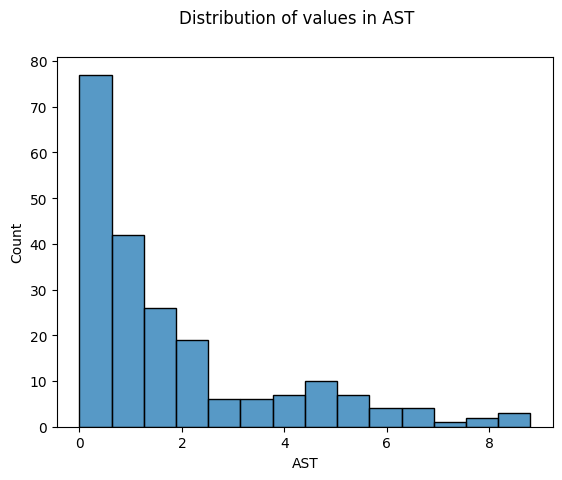

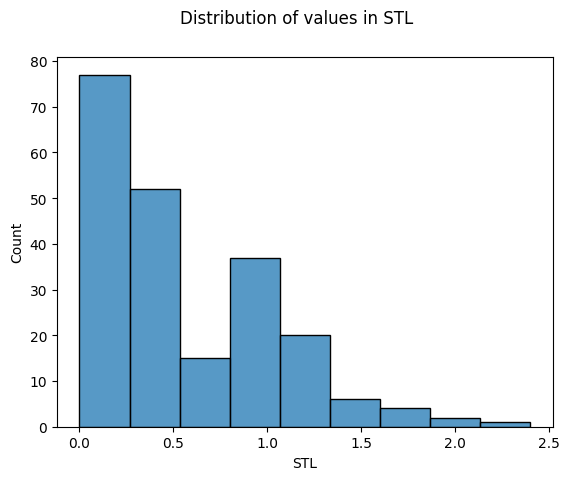

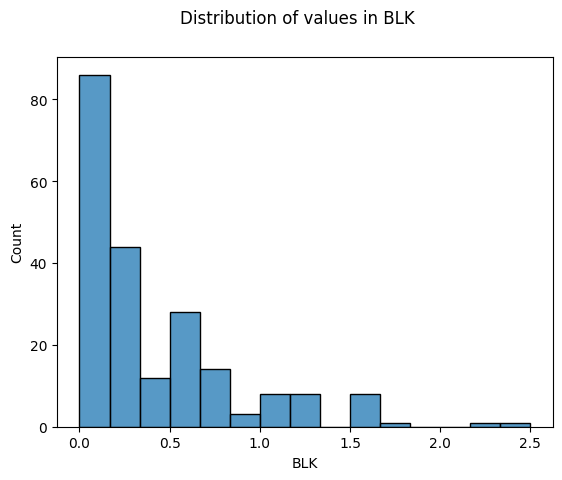

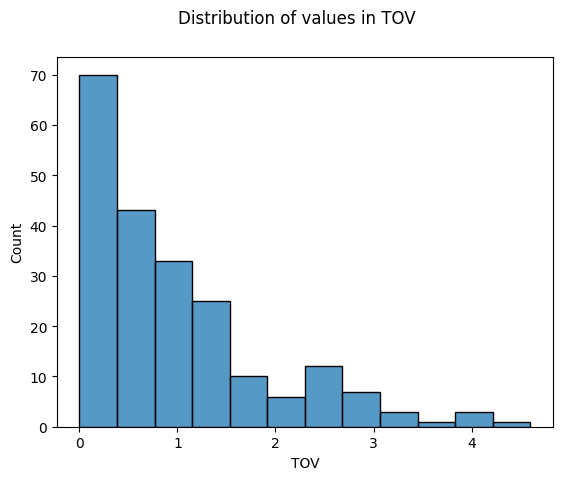

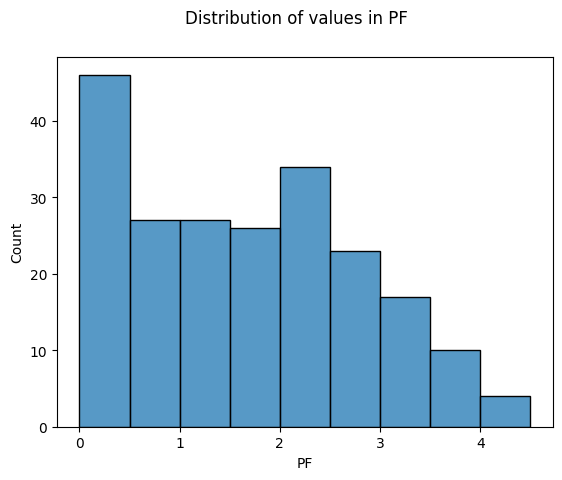

In [12]:
for feature in numerical_df.columns:
    plt.figure()
    sns.histplot(data = numerical_df, x = feature)
    plt.suptitle(f"Distribution of values in {feature}")
    plt.savefig(f"./Figures/EDA/{feature}.png", dpi=100, bbox_inches = "tight")

### While some features already follow a normal distribution, most are right skewed in some sense, so for simplicity, all features will be normalized

In [37]:
scaler = StandardScaler()
numerical_df[numerical_df.columns] = scaler.fit_transform(numerical_df[numerical_df.columns])
numerical_df

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF
0,-0.635196,0.206292,-0.315059,0.032834,-0.265682,-0.331798,0.435515,-0.957010,-0.965571,-1.249703,...,-0.136166,-0.539862,1.715319,-0.366901,0.246799,-0.605531,-0.277504,1.987459,-0.591965,0.521759
1,-0.195287,-0.526429,0.200930,1.376889,2.154425,2.038275,0.473375,-0.541172,-0.281891,-0.288876,...,1.154829,0.363192,1.496885,1.984685,1.998319,0.998600,-0.277504,-0.830641,0.663333,1.215277
2,-0.415242,1.488553,-0.487055,0.271777,-0.166225,0.025336,-0.224329,0.602382,0.964820,0.172320,...,-0.505022,1.148218,-0.578238,-0.541093,-0.561594,0.246663,0.123752,0.036467,-0.068924,-0.085069
3,0.244623,-1.075970,-0.315059,0.114970,-0.862421,-0.705166,-1.122148,-0.437213,-0.080809,-0.288876,...,0.140475,1.148218,0.186281,0.155674,0.179433,-0.405015,-0.076876,-0.830641,0.558725,0.348380
4,-0.415242,-0.709609,0.028934,0.884069,1.060404,0.398704,1.452323,-0.957010,-1.086221,-1.249703,...,2.215289,0.302805,3.244357,3.204025,3.480375,-0.254628,1.528145,1.337129,0.349509,0.348380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,-1.295060,0.389472,-0.659052,-0.542123,-0.497747,-0.575299,0.419289,-0.021375,-0.201458,0.715187,...,-0.597236,0.462006,-0.469021,0.068578,-0.090031,-0.154370,-0.277504,-0.180310,-0.696573,-0.431829
210,0.464577,-0.160069,-0.659052,-1.146948,-0.928725,-0.932433,-0.851721,-0.957010,-0.804705,-1.249703,...,-0.781664,-1.596628,-0.796672,-0.715284,-0.797376,-0.705790,-0.879387,-0.830641,-1.010398,-1.038657
211,0.904487,-0.709609,-0.487055,0.510720,-0.033617,-0.299331,1.041273,0.602382,-0.080809,1.632776,...,-0.551129,1.148218,-0.359804,-0.062066,-0.157398,-0.003982,0.926262,-0.180310,-1.010398,-0.258449
212,1.784306,-1.259150,-0.659052,-1.191750,-1.028181,-1.111000,-2.203859,-0.957010,-1.086221,-1.249703,...,-0.781664,-1.596628,-0.905889,-1.150763,-1.167890,-0.906306,-1.080014,-0.830641,-1.010398,-1.385416


### Since Categorical Data will be untouched and used as labels, and Numerical Data is normalized, the data will be combined with the target value data (PTS) and saved

In [41]:
final_df = pd.concat([categorical_df, df_raw['PTS'], numerical_df], axis = 1)
final_df.to_csv("./Data/cleaned_data.csv", sep = '\t', index = False)
final_df

,Player,Tm,PTS,Age,G,GS,MP,FG,FGA,FG%,...,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF
0,Precious Achiuwa,NYK,5.2,-0.635196,0.206292,-0.315059,0.032834,-0.265682,-0.331798,0.435515,...,-0.136166,-0.539862,1.715319,-0.366901,0.246799,-0.605531,-0.277504,1.987459,-0.591965,0.521759
1,Bam Adebayo,MIA,22.6,-0.195287,-0.526429,0.200930,1.376889,2.154425,2.038275,0.473375,...,1.154829,0.363192,1.496885,1.984685,1.998319,0.998600,-0.277504,-0.830641,0.663333,1.215277
2,Nickeil Alexander-Walker,MIN,7.3,-0.415242,1.488553,-0.487055,0.271777,-0.166225,0.025336,-0.224329,...,-0.505022,1.148218,-0.578238,-0.541093,-0.561594,0.246663,0.123752,0.036467,-0.068924,-0.085069
3,Grayson Allen,PHO,3.5,0.244623,-1.075970,-0.315059,0.114970,-0.862421,-0.705166,-1.122148,...,0.140475,1.148218,0.186281,0.155674,0.179433,-0.405015,-0.076876,-0.830641,0.558725,0.348380
4,Jarrett Allen,CLE,17.0,-0.415242,-0.709609,0.028934,0.884069,1.060404,0.398704,1.452323,...,2.215289,0.302805,3.244357,3.204025,3.480375,-0.254628,1.528145,1.337129,0.349509,0.348380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,Jaylin Williams,OKC,4.4,-1.295060,0.389472,-0.659052,-0.542123,-0.497747,-0.575299,0.419289,...,-0.597236,0.462006,-0.469021,0.068578,-0.090031,-0.154370,-0.277504,-0.180310,-0.696573,-0.431829
210,Kenrich Williams,OKC,0.6,0.464577,-0.160069,-0.659052,-1.146948,-0.928725,-0.932433,-0.851721,...,-0.781664,-1.596628,-0.796672,-0.715284,-0.797376,-0.705790,-0.879387,-0.830641,-1.010398,-1.038657
211,Delon Wright,MIA,8.0,0.904487,-0.709609,-0.487055,0.510720,-0.033617,-0.299331,1.041273,...,-0.551129,1.148218,-0.359804,-0.062066,-0.157398,-0.003982,0.926262,-0.180310,-1.010398,-0.258449
212,Thaddeus Young,PHO,0.0,1.784306,-1.259150,-0.659052,-1.191750,-1.028181,-1.111000,-2.203859,...,-0.781664,-1.596628,-0.905889,-1.150763,-1.167890,-0.906306,-1.080014,-0.830641,-1.010398,-1.385416
